In [1]:
from __future__ import division

from models import *
from utils.logger import *
from utils.utils import *
from utils.datasets import *
from utils.parse_config import *
from test import evaluate

from terminaltables import AsciiTable
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import PIL

import os
import sys
import time
import datetime
import argparse

import torch
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision import transforms
from torch.autograd import Variable
import torch.optim as optim

import warnings
warnings.simplefilter("ignore")

/home/szuyu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/szuyu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/szuyu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/szuyu/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: Futu

In [5]:
class options():
    def __init__(self):
        self.epochs = 1
        self.batch_size = 8
        self.gradient_accumulations = 2
        self.data_config = 'config/custom.data'
        
        self.model_def = 'config/yolov3-tiny-custom.cfg'
        self.pretrained_weights = 'weights/yolov3-tiny.conv.15'
        
        #self.model_def = 'config/yolov3.cfg'
        #self.pretrained_weights = 'weights/darknet53.conv.74'
        self.n_cpu = 8
        self.img_size = 416
        self.checkpoint_interval = 1
        self.evaluation_interval = 1
        self.compute_map = False
        self.multiscale_training=True

opt = options()

In [3]:
logger = Logger("logs")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

os.makedirs("output", exist_ok=True)
os.makedirs("checkpoints", exist_ok=True)

# Get data configuration
data_config = parse_data_config(opt.data_config)
train_path = data_config["train"]
valid_path = data_config["valid"]
class_names = load_classes(data_config["names"])

In [6]:
model = Darknet(opt.model_def).to(device)
model.apply(weights_init_normal)
model

Darknet(
  (module_list): ModuleList(
    (0): Sequential(
      (conv_0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_0): BatchNorm2d(16, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_0): LeakyReLU(negative_slope=0.1)
    )
    (1): Sequential(
      (maxpool_1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (2): Sequential(
      (conv_2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_2): BatchNorm2d(32, eps=1e-05, momentum=0.9, affine=True, track_running_stats=True)
      (leaky_2): LeakyReLU(negative_slope=0.1)
    )
    (3): Sequential(
      (maxpool_3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    )
    (4): Sequential(
      (conv_4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (batch_norm_4): BatchNorm2d(64, eps=1e-05, momentum=0.9, aff

In [7]:
model.load_darknet_weights(opt.pretrained_weights)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


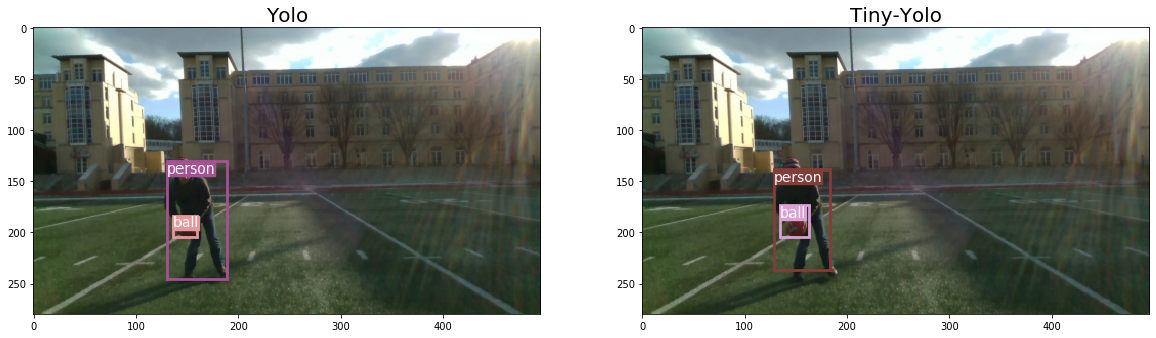

In [23]:
def vis2(img1, img2):
    f, axs = plt.subplots(1,2,figsize=(20,10))
    axs[0].set_title('Yolo', size=20)
    axs[0].imshow(mpimg.imread(img1))
    
    axs[1].set_title('Tiny-Yolo', size=20)
    axs[1].imshow(mpimg.imread(img2))
    plt.show()
    f.savefig('demo6.png', transparent=False)
    
vis2('output/000100.png', 'output-tiny/000100.png')